In [11]:
from benchmark_new import *
%matplotlib inline

In [16]:
helpers = 'best_affinity_diverse'
helpers = 'pdb'
mcss = '../../../mcss_sizes.pkl'

versions = ['stats21', 'stats22', 'stats23', 'stats24', 'stats26', 'stats27', 'stats28', 'stats29', 'stats30', 'stats31']

data = pd.concat(load(version, helpers, mcss) for version in ['stats33'])
data = add_correct(data, thresh = 2.0)
#data = filter_to_ubiquitous_ligands(data)
data = data[data.mcss < 0.5]
data = data[data.best_correct]
data = data[data.index.get_level_values('mode') == 'standard']

ligand = data.xs((helpers, 'standard', 0, 'mcss_contact_hbond_sb', 1.0),
                  level=('helpers', 'mode', 'n_ligs', 'features', 'alpha')).filter(regex='rmsd|correct')
target = ligand.groupby(level=list(range(len(ligand.index.levels)-1))).mean().dropna()
print(ligand.shape[0])
family_ligand = ligand.groupby(level=list(range(len(ligand.index.levels)-2))).mean()
family_target = target.groupby(level=list(range(len(target.index.levels)-1))).mean()

278


# Overall performance

In [13]:
data[data.index.get_level_values('ligand') == '5IRX_lig']

,,,,,,,,,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd,mcss,combind_correct,glide_correct,best_correct
version,helpers,mode,features,alpha,n_ligs,family,protein,ligand,,,,,,,,,,


In [17]:
dfs = []
for name, df in {'Ligand': ligand.groupby('version').mean(),
                 'Target': target.groupby('version').mean(),
                 'Drug-Target': drug_average(family_target),
                 'Drug-Ligand': drug_average(family_ligand)}.items():
    df = df.copy()
    df['metric'] = name
    dfs += [df]

dfs = pd.concat(dfs)
dfs['version'] = dfs.index.get_level_values('version')
dfs = dfs.set_index(['metric', 'version'])
dfs.filter(regex='correct')

,,combind_correct,glide_correct,best_correct
metric,version,,,
Ligand,stats33,0.633094,0.600719,1.0
Target,stats33,0.571008,0.551333,1.0
Drug-Target,stats33,0.533890,0.500243,1.0
Drug-Ligand,stats33,0.569448,0.526934,1.0


# Performance by Family

In [5]:
family_ligand.filter(regex='correct')

combind_correct  glide_correct  best_correct
version family                                                        
stats21 GPCR                     0.666667       0.444444           1.0
        Nuclear Receptor         0.900000       0.800000           1.0
        Transporter              0.600000       0.600000           1.0
        Peptidase                0.609375       0.531250           1.0
        Kinase                   0.656250       0.687500           1.0
        Other                    0.523810       0.460317           1.0
stats22 GPCR                     0.611111       0.444444           1.0
        Nuclear Receptor         0.800000       0.800000           1.0
        Transporter              0.600000       0.600000           1.0
        Peptidase                0.609375       0.531250           1.0
        Kinase                   0.687500       0.687500           1.0
        Other                    0.523810       0.460317           1.0
stats23 GPCR                     0.611111       0.444444           1.0
        Nuclear Receptor         0.900000       0.800000           1.0
        Transporter              0.600000       0.600000           1.0
        Peptidase                0.546875       0.531250           1.0
        Kinase                   0.609375       0.687500           1.0
        Other                    0.492063       0.460317           1.0
stats24 GPCR                     0.611111       0.444444           1.0
        Nuclear Receptor         0.900000       0.800000           1.0
        Transporter              0.600000       0.600000           1.0
        Peptidase                0.593750       0.531250           1.0
        Kinase                   0.687500       0.687500           1.0
        Other                    0.555556       0.460317           1.0
stats26 GPCR                     0.666667       0.444444           1.0
        Nuclear Receptor         0.900000       0.800000           1.0
        Transporter              0.600000       0.600000           1.0
        Peptidase                0.578125       0.531250           1.0
        Kinase                   0.640625       0.687500           1.0
        Other                    0.492063       0.460317           1.0
stats27 GPCR                     0.666667       0.444444           1.0
        Nuclear Receptor         0.900000       0.800000           1.0
        Transporter              0.600000       0.600000           1.0
        Peptidase                0.609375       0.531250           1.0
        Kinase                   0.656250       0.687500           1.0
        Other                    0.523810       0.460317           1.0
stats28 GPCR                     0.611111       0.444444           1.0
        Nuclear Receptor         0.900000       0.800000           1.0
        Transporter              0.600000       0.600000           1.0
        Peptidase                0.609375       0.531250           1.0
        Kinase                   0.671875       0.687500           1.0
        Other                    0.507937       0.460317           1.0
stats29 GPCR                     0.611111       0.444444           1.0
        Nuclear Receptor         0.800000       0.800000           1.0
        Transporter              0.600000       0.600000           1.0
        Peptidase                0.546875       0.531250           1.0
        Kinase                   0.671875       0.687500           1.0
        Other                    0.507937       0.460317           1.0
stats30 GPCR                     0.666667       0.444444           1.0
        Nuclear Receptor         0.850000       0.800000           1.0
        Transporter              0.600000       0.600000           1.0
        Peptidase                0.562500       0.531250           1.0
        Kinase                   0.656250       0.687500           1.0
        Other                    0.523810       0.460317           1.0
stats31 GPCR                     0.666667       0.

In [6]:
family_target.filter(regex='correct')

combind_correct  glide_correct  best_correct
version family                                                        
stats21 GPCR                     0.620000       0.396667           1.0
        Nuclear Receptor         0.921296       0.837963           1.0
        Transporter              0.375000       0.375000           1.0
        Peptidase                0.571429       0.500000           1.0
        Kinase                   0.636771       0.706208           1.0
        Other                    0.500336       0.446154           1.0
stats22 GPCR                     0.526667       0.396667           1.0
        Nuclear Receptor         0.837963       0.837963           1.0
        Transporter              0.375000       0.375000           1.0
        Peptidase                0.574603       0.500000           1.0
        Kinase                   0.698762       0.706208           1.0
        Other                    0.534035       0.446154           1.0
stats23 GPCR                     0.586667       0.396667           1.0
        Nuclear Receptor         0.921296       0.837963           1.0
        Transporter              0.375000       0.375000           1.0
        Peptidase                0.479365       0.500000           1.0
        Kinase                   0.561446       0.706208           1.0
        Other                    0.468854       0.446154           1.0
stats24 GPCR                     0.520000       0.396667           1.0
        Nuclear Receptor         0.921296       0.837963           1.0
        Transporter              0.375000       0.375000           1.0
        Peptidase                0.553968       0.500000           1.0
        Kinase                   0.673827       0.706208           1.0
        Other                    0.518854       0.446154           1.0
stats26 GPCR                     0.620000       0.396667           1.0
        Nuclear Receptor         0.921296       0.837963           1.0
        Transporter              0.375000       0.375000           1.0
        Peptidase                0.523810       0.500000           1.0
        Kinase                   0.625006       0.706208           1.0
        Other                    0.478114       0.446154           1.0
stats27 GPCR                     0.620000       0.396667           1.0
        Nuclear Receptor         0.921296       0.837963           1.0
        Transporter              0.375000       0.375000           1.0
        Peptidase                0.571429       0.500000           1.0
        Kinase                   0.636771       0.706208           1.0
        Other                    0.496632       0.446154           1.0
stats28 GPCR                     0.586667       0.396667           1.0
        Nuclear Receptor         0.921296       0.837963           1.0
        Transporter              0.375000       0.375000           1.0
        Peptidase                0.571429       0.500000           1.0
        Kinase                   0.648536       0.706208           1.0
        Other                    0.485521       0.446154           1.0
stats29 GPCR                     0.586667       0.396667           1.0
        Nuclear Receptor         0.837963       0.837963           1.0
        Transporter              0.375000       0.375000           1.0
        Peptidase                0.498413       0.500000           1.0
        Kinase                   0.679628       0.706208           1.0
        Other                    0.593213       0.446154           1.0
stats30 GPCR                     0.620000       0.396667           1.0
        Nuclear Receptor         0.879630       0.837963           1.0
        Transporter              0.375000       0.375000           1.0
        Peptidase                0.512698       0.500000           1.0
        Kinase                   0.634250       0.706208           1.0
        Other                    0.542501       0.446154           1.0
stats31 GPCR                     0.620000       0.

# Performance by target

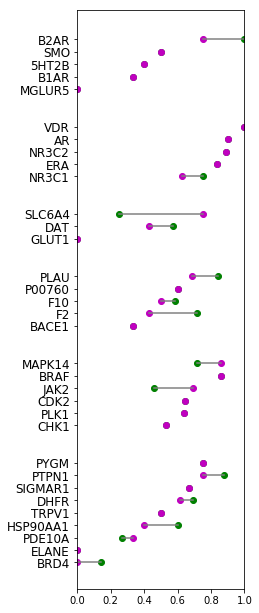

In [18]:
dumbell_plot(target.loc['stats33'], 'correct')

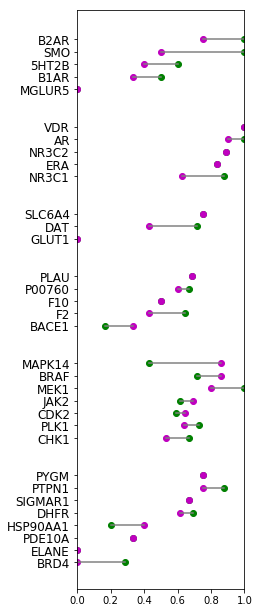

In [65]:
dumbell_plot(target.loc['stats26'], 'correct')

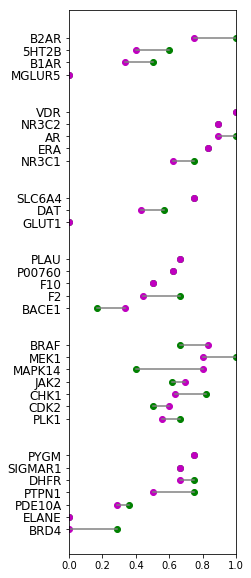

In [95]:
dumbell_plot(target.loc['stats26'], 'correct')

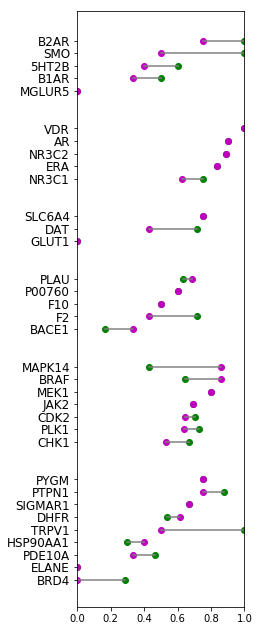

In [87]:
dumbell_plot(target.loc['stats30'], 'correct')